# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


# Linear Regression
We are trying to fit a straight line curve (y = mX + b) to some data in order to model a relationship which we believe to be linear in nature. Typically we will use least squares method which consists of minimizing the sum of squares of the vertical distance between each point and the model line. 

## Polynomial Regression
Similarly, we are attemptiong to model a relationship between a dependant variable Y and a dependant variable X, this time as a polynomial of degree N (still linear with respect to the weights). This allows us to model a broader range of relationships between our data. 

#  Overfitting
Overfitting in polynomial regression can occur when our polynomial modeled curve is of a too-high degree. It seems to fit our training data very well, however, the actual relationship between our data is more similar to a lower degree polynomial and thus when we apply our model to test data, the accuracy is low.

#  Underfitting
Underfitting occurs when our polynomialmodel is of too low a degree to accurately reflect the relationship between our data. It may appear to fit the training data, however, it performs poorly on the test data because it is not representative of the actual relationship between the variables. For example, our mode polynomial curve might be a degree 2, when the actual data is more similar to a degree 4. 

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

## Logistic Regression
Allows us us to fit a model a relationship where there is one or more independant variables with a dependant variable that is binary (or discrete). It is based off the sigmoid function, whose graph starts off slowly, goes up quickly then slows down. it is meant to represent the probability of an occurence (between 0 and 1).

## Linear SVM
Support Vector Machine is a supervised ml algorithm which is mostly used for classification problems. Support vectors represent the coordinates of our data points. The goal of the algorithm is to select the ebst hyperplane to segregate the data properly. The margin represents the distance between nearest data points in different partitions and the goal is to maximize the margin while still maintaining the right seperations. In order to get the best classification partitions possible, we want to penalize the model for each mistake or mismatch. For this, we introduce slack variables. They represent the deviation of the data from the margin and allow us to use a soft margin, meaning that we can relax the boundaries. Kernel functions allow us to computer a sort of dot product between vecotrs in arbitrary dimension. It can be thought of as the "similarity" between the vectors which helps us classify them. 

One example is that of 2 rings of data, one within the other as follows as exemplifies by the followjg link:
https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78

Clearly a linear kernel cannot separate the data but in a higher dimension it can.



### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

### K-NN and Lazy Learning
In supervised learning, the data is input with the desired labels. For example, if it is a classification problem, we would input data as well as the actual answer (class) to our model for it to learn. In unsupervised learning, the classes are not defined in advanced and the algorithm must discover them itself. 
Lazy algorithms don't learn a predictive fucntion, but rather learn only from the current data (they memorize the data) and won't generalize beyond it until they are asked to do so (hence the "lazy"). 
K-NN is lazy because it has very little training involved. It must keep the training data when it makes a prediction since it does not generalize from it.
K-NN can be used to predict someone's political affiliation depending on some input data such as age, social class, ethnicity,etc. A lazy learning algorithm might be useful in this case since it will use the information from the dataset which is most useful for the current data that it is predicitng on. 

### Main steps of K-NN
First we must choose a distance metric, for simplicity assume we choose euclidiean distance

Fist initialize a K
For each new input data, find the K nearest neighboors using our distance metric. 
Get the labels for the selected K entries and return mode/mean/majority element depending classification or regression.

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [15]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
import math
import operator
from sklearn.datasets import load_iris

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

#Function to calculate euclidean norm between points
def Edistance(input1, input2, length):
    dist = 0
    for x in range(length):
        dist += np.square(input1[x] - input2[x])
    return np.sqrt(dist)


def KNN(train, test, K):
    length = test.shape[1]
    distances = {}
    sort = {}
    
    for x in range(len(train)):
        #get euclidean distance between points in test
        dist = Edistance(test, train.iloc[x], length)
        
        # store in distances
        distances[x] = dist[0]
        
    # sort the distances
    distances_sorted = sorted(distances.items(), key = operator.itemgetter(1))
    neigh= []
    
    
    for x in range(K):
        neigh.append(distances_sorted[x][0])
        votes = {}
        
        for x in range(len(neigh)):
            resp = train.iloc[neigh[x]][-1]
    
            if resp in votes:
                votes[resp] += 1
            else:
                votes[resp] = 1
                
        Svotes = sorted(votes.items(), key = operator.itemgetter(1), reverse = True)
        return (Svotes[0][0], neigh)
    



### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

## Bagging vs. Boosting

Both represent ensemble techniques on a base learning algorithm and help us build more robusts models

In bagging, a subset of features and data is used to create a model and this process is repeated on different subsets to generate different models (thus generating additional data for training). At the end, we take the average prediction of all the models. This allows us to greatly reduce variance.

In Boosting, subsets of data are used to create models but then instead of continuing to create subsets at random like in bagging, a cost function is used to select the most performant ones. For example, the more performing classifiers will have a lower weight while the less will have a higher one so that future iterations focus on the misclassified data.


## Random Forest & Decision Trees
Decision trees are used in both classification and regression and sequences the data through different streams depending on different criteria, like going through an uspside down tree. At each step, the data is verified for a certain criteria and the stream splits depending on the different possibilities. At the end of the stream, the input is classified according to the class associated to that particular end of stream. 

Random forests are collections of decision trees whose results are averaged out to get a final answer. 


Decision tree pros:
1. Very fast to code and run
2. Are useful for both numerical and categorical data and can be used in both classification & regresion
3. Very transparent and easy to follow what is going on in the decision making process.

Decision tree cons:
1. Overfitting is a common issue for decision trees because of how specific they are, meaning that there is likely very little validation data that fits a specific stream perfectly.
2. They typically use greedy learning algorithms and thus do not take into account the global miminmum
3. If they are not deep enough, the the error due to bias becomes very large.

Random Forest pros:
1. Reduced error due to variance when compared to single decision decision trees.
2. Reduced error due to bias
3. Limit overfitting by averaging decision trees

Random Forest Cons
1. Takes much more computation that a random forest
2. much more difficult to intuitively get an understanding of what the model is doing
3. unless there is a large numbe

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

PCA attempts to find a lower dimension subspace while maintaining the validity of the data.
We choose the d<n orthogonal principal axes such that the projection of the data onto the axes retains the highest variance.
1. Choose the first principal component U1 to have max variance. This is given by eigenvector with the largest eigein value of the covariance matrix. 
2. Continue as above, selecting the eigenvectors associated to the d largest eigen values to determine the principal components. 
When calculating the covariance matrix, it is important to substract the mean to remove the intercept. This ensures that the first principal component describes the direction of highest variance. If it is not performed, there is no guarantee that the 
principle components will maximize variance. Note that if we denote V, the matrix of all eigenvectors and L the diagonal matrix of all
eigen values, the the covariance matrix (C) is represented by CV=VL

An autoencoder similarly to pca uses dimension resuction, however it is not constrained to reduce to linear subspaces. In fact, autoencoders may not even reduce dimensionality at all.
This allows autoencodes to be much more general when compared to PCA, since they are not constrained to linear subspaces.

The reducd dimension will be identical when a single layer autoencoder is used with linear activation function



### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [7]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Total dataset size:
n_samples: 760
n_features: 1850
n_classes: 3


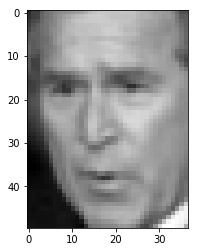

Iteration 1, loss = 1.03101430
Validation score: 0.688525
Iteration 2, loss = 0.51224097
Validation score: 0.688525
Iteration 3, loss = 0.37621611
Validation score: 0.754098
Iteration 4, loss = 0.24712022
Validation score: 0.803279
Iteration 5, loss = 0.17171254
Validation score: 0.852459
Iteration 6, loss = 0.13085614
Validation score: 0.918033
Iteration 7, loss = 0.10360583
Validation score: 0.934426
Iteration 8, loss = 0.08178097
Validation score: 0.918033
Iteration 9, loss = 0.06538321
Validation score: 0.901639
Iteration 10, loss = 0.05314006
Validation score: 0.901639
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [15]:
# plot an example image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

plt.imshow(X[1].reshape(h,w), cmap = 'gray')
plt.show()
### insert your code here ###
myPCA = PCA(n_components = 100, whiten=True).fit(X_train)

X_train_reduced = myPCA.transform(X_train)
X_test_reduced = myPCA.transform(X_test)

classifier = MLPClassifier(hidden_layer_sizes=(1024), batch_size=128,verbose=True, early_stopping=True).fit(X_train_reduced, y_train)

y_predicted = classifier.predict(X_test_reduced)

classReport = classification_report(y_test, y_predicted, target_names = target_names)



## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

